In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def imagen(img):
    img=cv2.imread('G:/.shortcut-targets-by-id/1Ow6KjVPo1myLESTKlM8Q0m1s8bsDHkGo/TratamientoDigitalImagenes_2022_2/Imagenes/'+img,
                  cv2.IMREAD_GRAYSCALE)
    if img is None:
        img=cv2.imread('C:/Users/claudio.pacheco/Documents/Repositorio/'+img,cv2.IMREAD_GRAYSCALE)
    #Cortar la imagen a 256x256 de la esquina superior izquierda
    plt.imshow(img,cmap='gray')
    return img

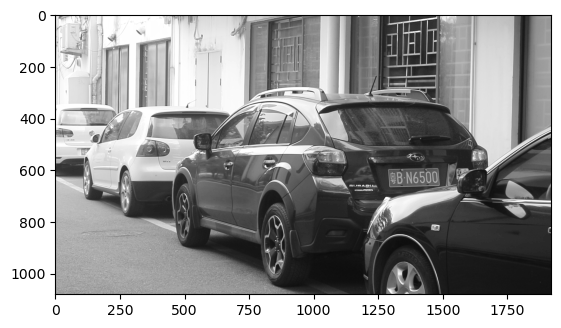

In [3]:
img=imagen('DPP0357.TIF')

In [4]:
#Aplicar filtros blur, gaussianblur, medianblur
blur = cv2.blur(img, (5,5))
gaussian_blur = cv2.GaussianBlur(img, (5,5), 0)
median_blur = cv2.medianBlur(img, 5)

In [5]:
#Calcular los residuos entre la imagen original y los filtros
residuo_blur = cv2.subtract(img, blur)
residuo_gaussian_blur = cv2.subtract(img, gaussian_blur)
residuo_median_blur = cv2.subtract(img, median_blur)

#Convertir la imagen a float32
imgfloat32 = np.float32(img)/255.0
blurfloat32 = np.float32(blur)/255.0
gaussian_blurfloat32 = np.float32(gaussian_blur)/255.0
median_blurfloat32 = np.float32(median_blur)/255.0

#Residuos de la imagen float32
residuo_blurfloat32 = cv2.subtract(imgfloat32, blurfloat32)
residuo_gaussian_blurfloat32 = cv2.subtract(imgfloat32, gaussian_blurfloat32)
residuo_median_blurfloat32 = cv2.subtract(imgfloat32, median_blurfloat32)

In [6]:
#Obtener los cálculos solicitados
def compute_metrics(imageA, imageB):
    
    # MSE
    def mse():
        err = np.sum((imageA.astype("float") - imageB.astype("float"))**2)
        err /= float(imageA.shape[0]*imageA.shape[1])
        return err

    # PSNR
    def psnr():
        mse_val = np.sum((imageA.astype("float") - imageB.astype("float"))**2)
        mse_val /= float(imageA.shape[0]*imageA.shape[1])
        return 10 * np.log10((255**2)/mse_val)

    # Media
    def media():
        diff = imageA.astype("float") - imageB.astype("float")
        return np.mean(diff)

    # Varianza
    def varianza():
        diff = imageA.astype("float") - imageB.astype("float")
        return np.var(diff)
    
    return {
        'MSE': mse(),
        'PSNR': psnr(),
        'Media': media(),
        'Varianza': varianza()
    }

In [7]:
print(compute_metrics(img,blur))
print(compute_metrics(img,gaussian_blur))
print(compute_metrics(img,median_blur))
print(compute_metrics(imgfloat32,blurfloat32))
print(compute_metrics(imgfloat32,gaussian_blurfloat32))

{'MSE': 112.95097318672839, 'PSNR': 27.60190383709756, 'Media': -0.00038290895061728395, 'Varianza': 112.95097304010916}
{'MSE': 41.96769772376543, 'PSNR': 31.901652156566453, 'Media': -0.002334104938271605, 'Varianza': 41.96769227571958}
{'MSE': 68.4183733603395, 'PSNR': 29.779076162019464, 'Media': 0.2642963927469136, 'Varianza': 68.34852077712047}
{'MSE': 0.001737039171846667, 'PSNR': 75.73270748566446, 'Media': -1.5018557705506856e-06, 'Varianza': 0.0017370391695910958}
{'MSE': 0.0006454086470102608, 'PSNR': 80.03245581201196, 'Media': -9.153521240938219e-06, 'Varianza': 0.00064540856322331}


In [8]:
def plot_residuals(residuo_blur, residuo_blurfloat32, residuo_gaussian_blur, 
                   residuo_gaussian_blurfloat32, residuo_median_blur, residuo_median_blurfloat32):
    
    plt.figure(figsize=(10,20))

    # Residuo Blur
    plt.subplot(6,2,1)
    plt.hist(residuo_blur.ravel(), 256, [0,256])
    plt.title('Residuo Blur',weight='bold')

    # Residuo Blur float32
    plt.subplot(6,2,2)
    plt.hist(residuo_blurfloat32.ravel(), 256, [0,256])
    plt.title('Residuo Blur float32',weight='bold')

    # Residuo Gaussian Blur
    plt.subplot(6,2,3)
    plt.hist(residuo_gaussian_blur.ravel(), 256, [0,256])
    plt.title('Residuo Gaussian Blur',weight='bold')

    # Residuo Gaussian Blur float32
    plt.subplot(6,2,4)
    plt.hist(residuo_gaussian_blurfloat32.ravel(), 256, [0,256])
    plt.title('Residuo Gaussian Blur float32',weight='bold')

    # Residuo Median Blur
    plt.subplot(6,2,5)
    plt.hist(residuo_median_blur.ravel(), 256, [0,256])
    plt.title('Residuo Median Blur',weight='bold')

    # Residuo Median Blur float32
    plt.subplot(6,2,6)
    plt.hist(residuo_median_blurfloat32.ravel(), 256, [0,256])
    plt.title('Residuo Median Blur float32',weight='bold')

    # Mostrar la gráfica
    plt.tight_layout()
    plt.show()

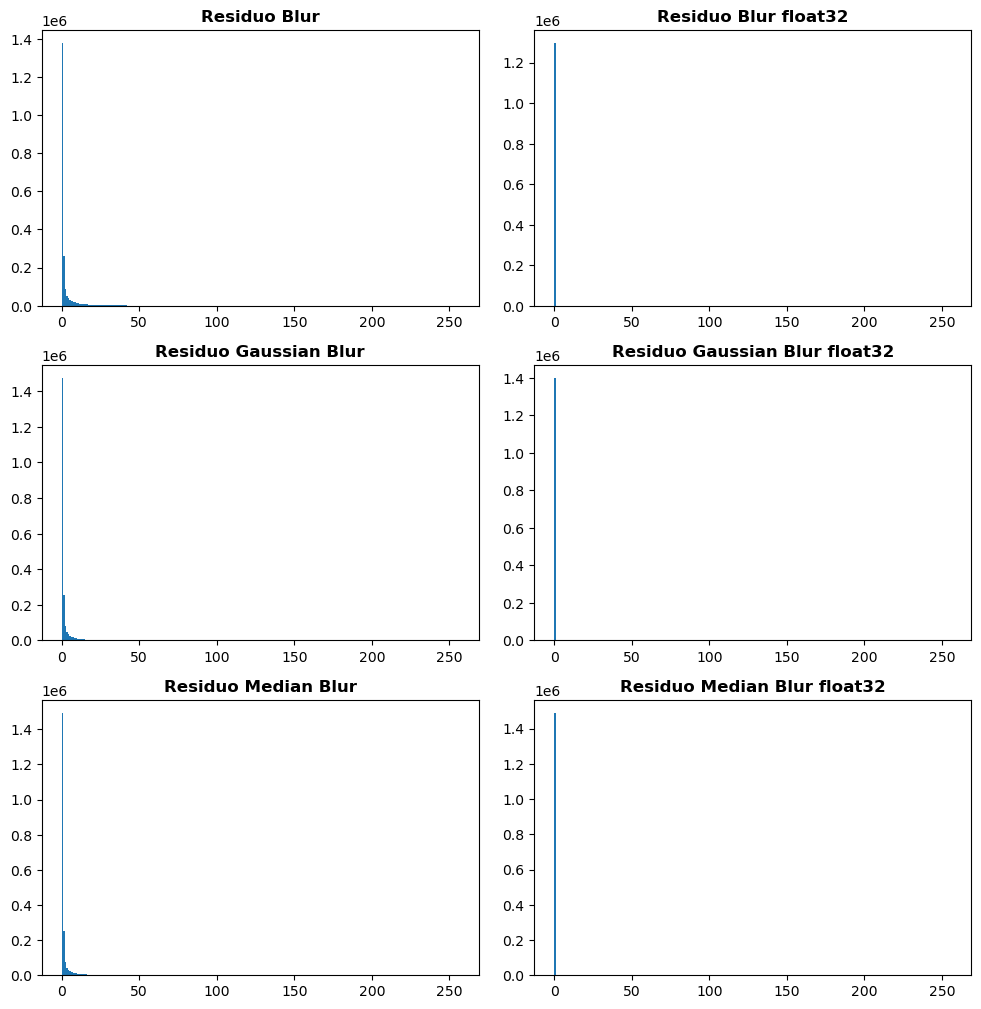

In [9]:
#Gráfica
plot_residuals(residuo_blur, residuo_blurfloat32, residuo_gaussian_blur, 
               residuo_gaussian_blurfloat32, residuo_median_blur, residuo_median_blurfloat32)

In [10]:
##Leer imágenes con ruido

img_ruido1=cv2.imread("G:/Mi unidad/infotec/mcdi/4to semestre/imagenes/DPP0357_sp.png",cv2.IMREAD_GRAYSCALE)
img_ruido2=cv2.imread("G:/Mi unidad/infotec/mcdi/4to semestre/imagenes/DPP0357_gs.png",cv2.IMREAD_GRAYSCALE)

In [11]:
#Aplicar el código con las imágenes con ruido
#Aplicar filtros blur, gaussianblur, medianblur
blur1 = cv2.blur(img_ruido1, (5,5))
gaussian_blur1 = cv2.GaussianBlur(img_ruido1, (5,5), 0)
median_blur1 = cv2.medianBlur(img_ruido1, 5)

blur2 = cv2.blur(img_ruido2, (5,5))
gaussian_blur2 = cv2.GaussianBlur(img_ruido2, (5,5), 0)
median_blur2 = cv2.medianBlur(img_ruido2, 5)

#Calcular los residuos entre la imagen original y los filtros
residuo_blur1 = cv2.subtract(img_ruido1, blur1)
residuo_gaussian_blur1 = cv2.subtract(img_ruido1, gaussian_blur1)
residuo_median_blur1 = cv2.subtract(img_ruido1, median_blur1)

residuo_blur2 = cv2.subtract(img_ruido2, blur2)
residuo_gaussian_blur2 = cv2.subtract(img_ruido2, gaussian_blur2)
residuo_median_blur2 = cv2.subtract(img_ruido2, median_blur2)

#Convertir la imagen a float32
imgfloat32_ruido1 = np.float32(img_ruido1)/255.0
blurfloat32_ruido1 = np.float32(blur1)/255.0
gaussian_blurfloat32_ruido1 = np.float32(gaussian_blur1)/255.0
median_blurfloat32_ruido1 = np.float32(median_blur1)/255.0

imgfloat32_ruido2 = np.float32(img_ruido2)/255.0
blurfloat32_ruido2 = np.float32(blur2)/255.0
gaussian_blurfloat32_ruido2 = np.float32(gaussian_blur2)/255.0
median_blurfloat32_ruido2 = np.float32(median_blur2)/255.0

#Residuos de la imagen float32
residuo_blurfloat32_ruido1 = cv2.subtract(imgfloat32_ruido1, blurfloat32_ruido1)
residuo_gaussian_blurfloat32_ruido1 = cv2.subtract(imgfloat32_ruido1, gaussian_blurfloat32_ruido1)
residuo_median_blurfloat32_ruido1 = cv2.subtract(imgfloat32_ruido1, median_blurfloat32_ruido1)

residuo_blurfloat32_ruido2 = cv2.subtract(imgfloat32_ruido2, blurfloat32_ruido2)
residuo_gaussian_blurfloat32_ruido2 = cv2.subtract(imgfloat32_ruido2, gaussian_blurfloat32_ruido2)
residuo_median_blurfloat32_ruido2 = cv2.subtract(imgfloat32_ruido2, median_blurfloat32_ruido2)

In [12]:
print(compute_metrics(img_ruido1,blur1))
print(compute_metrics(img_ruido1,gaussian_blur1))
print(compute_metrics(img_ruido1,median_blur1))
print(compute_metrics(imgfloat32_ruido1,blurfloat32_ruido1))
print(compute_metrics(imgfloat32_ruido1,gaussian_blurfloat32_ruido1))

{'MSE': 1084.1721115112305, 'PSNR': 17.779821292686197, 'Media': -0.006439208984375, 'Varianza': 1084.1720700478181}
{'MSE': 826.0038452148438, 'PSNR': 18.960982918142335, 'Media': -0.0059661865234375, 'Varianza': 826.0038096194621}
{'MSE': 1080.1661567687988, 'PSNR': 17.795897948092495, 'Media': -1.0934181213378906, 'Varianza': 1078.9705935807287}
{'MSE': 0.016673158237360732, 'PSNR': 65.91062488985612, 'Media': -2.525317817259065e-05, 'Varianza': 0.016673157599637722}
{'MSE': 0.01270286581428636, 'PSNR': 67.09178650390211, 'Media': -2.339802562545401e-05, 'Varianza': 0.012702865266818755}


Imagen ruido 1


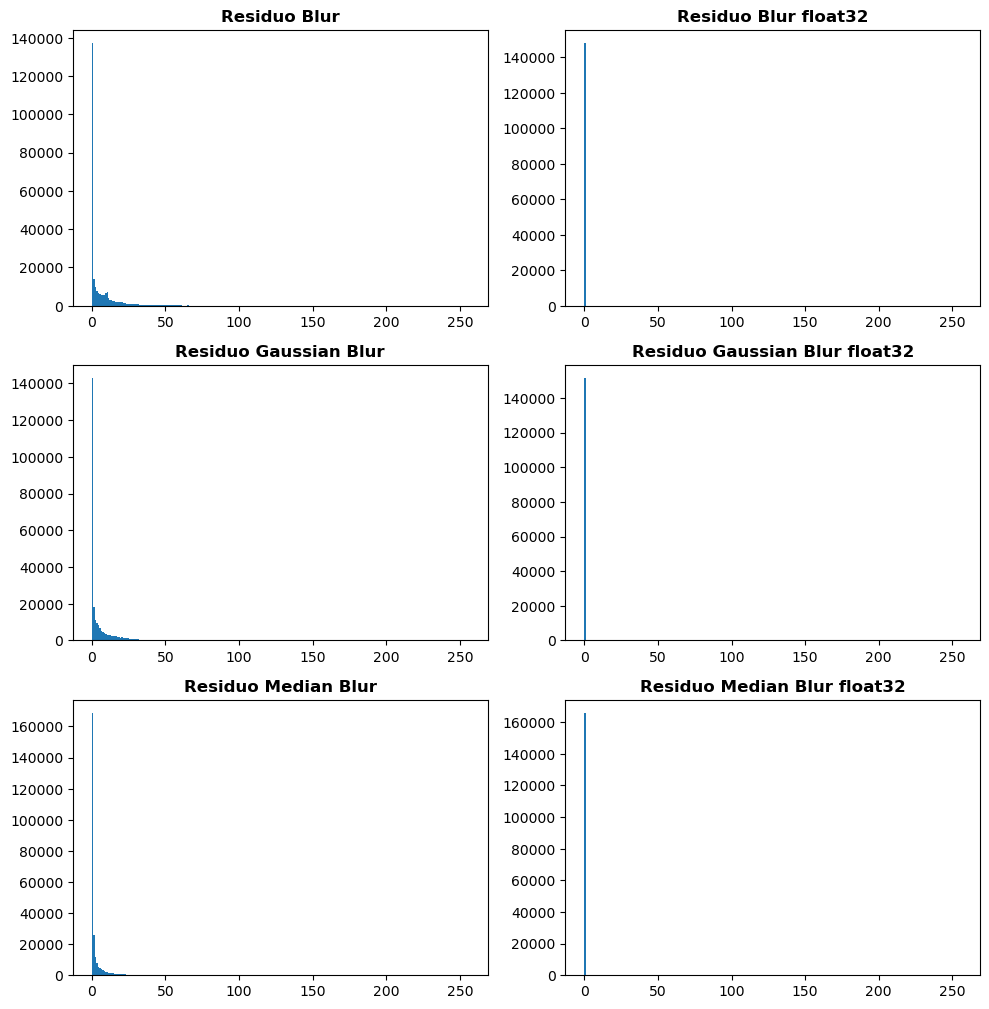

Imagen ruido 2


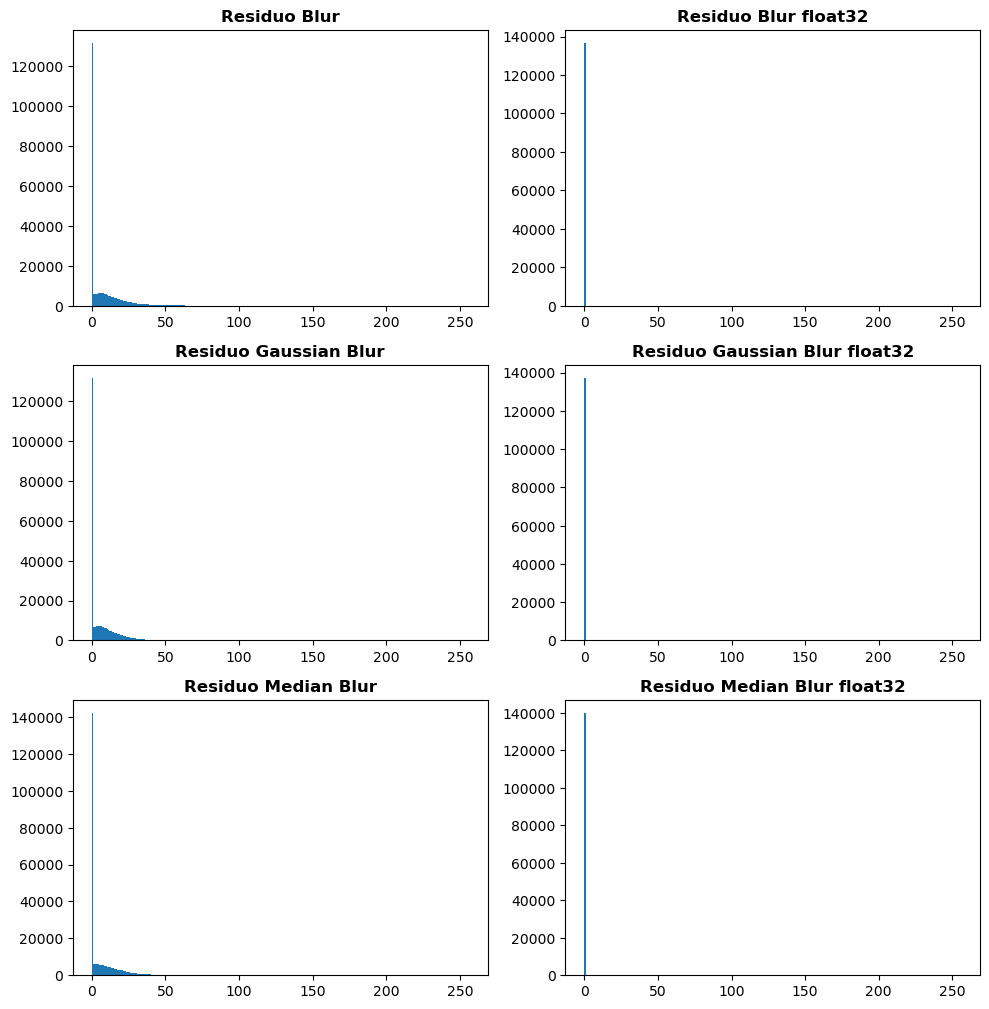

In [13]:
#Graficar residuales
print("Imagen ruido 1")
plot_residuals(residuo_blur1, residuo_blurfloat32_ruido1, residuo_gaussian_blur1,
                residuo_gaussian_blurfloat32_ruido1, residuo_median_blur1, 
                residuo_median_blurfloat32_ruido1)

print("Imagen ruido 2")
plot_residuals(residuo_blur2, residuo_blurfloat32_ruido2, residuo_gaussian_blur2,
                residuo_gaussian_blurfloat32_ruido2, residuo_median_blur2, 
                residuo_median_blurfloat32_ruido2)

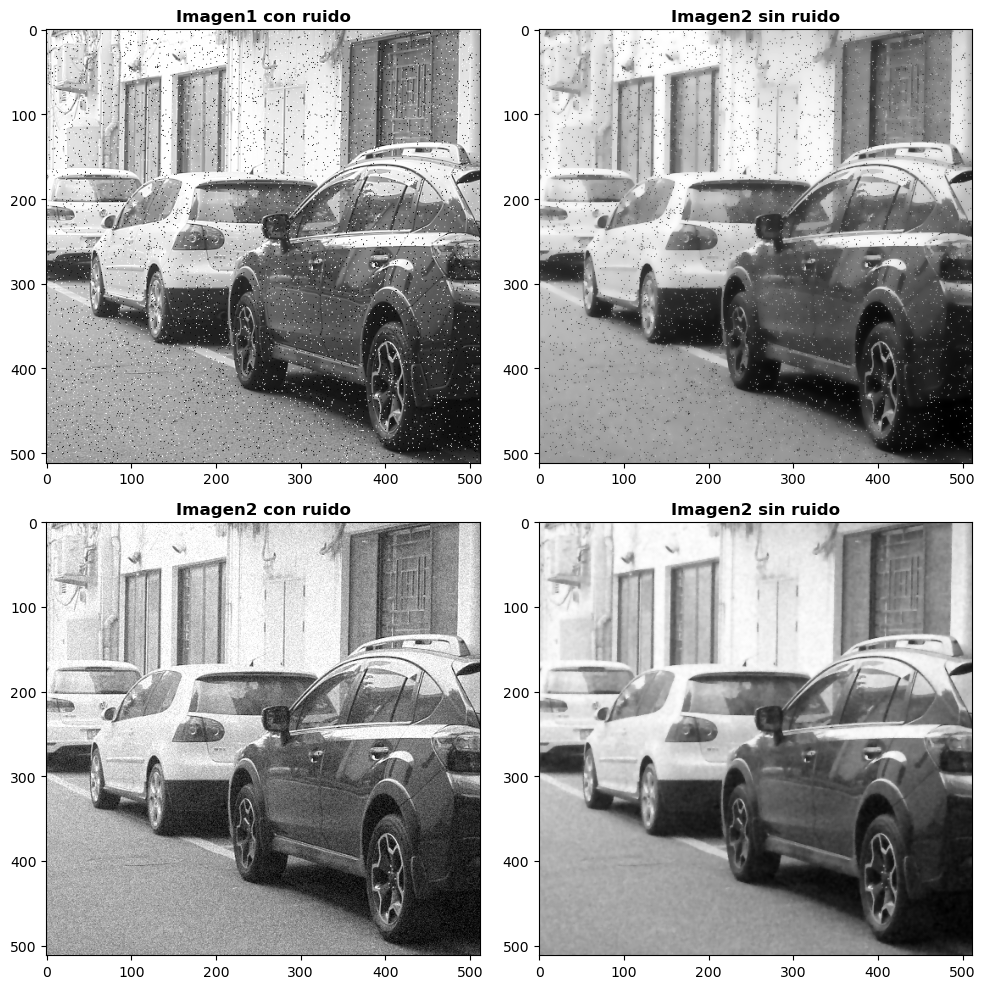

In [14]:
#Utilizar alguno de los métodos implementados en sci-kit-image para eliminar el ruido de las imágenes

from skimage.restoration import denoise_tv_chambolle

#Mostrar imagen con ruido y sin ruido
plt.figure(figsize=(10,10))

plt.subplot(2,2,1)
plt.imshow(img_ruido1,cmap='gray')
plt.title('Imagen1 con ruido',weight='bold')

plt.subplot(2,2,2)
plt.imshow(denoise_tv_chambolle(img_ruido1, weight=0.1),cmap='gray')
plt.title('Imagen2 sin ruido',weight='bold')

plt.subplot(2,2,3)
plt.imshow(img_ruido2,cmap='gray')
plt.title('Imagen2 con ruido',weight='bold')

plt.subplot(2,2,4)
plt.imshow(denoise_tv_chambolle(img_ruido2, weight=0.1),cmap='gray')
plt.title('Imagen2 sin ruido',weight='bold')

plt.tight_layout() 



In [15]:
#Calcular métricas
print("imagen ruido 1")
print(compute_metrics(img_ruido1,denoise_tv_chambolle(img_ruido1, weight=0.1)))
print("imagen ruido 2")
print(compute_metrics(img_ruido2,denoise_tv_chambolle(img_ruido2, weight=0.1)))

imagen ruido 1
{'MSE': 27638.729006216763, 'PSNR': 3.715622931598955, 'Media': 149.47162957284968, 'Varianza': 5296.960959053579}
imagen ruido 2
{'MSE': 27388.67866224286, 'PSNR': 3.7550928018528227, 'Media': 149.92261283724918, 'Varianza': 4911.888822295156}
